# Project On Customer Segmentation using K Means Clustering 
 # Mohd Irfan Qureshi

In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt #Importing the libraries and the data
from sklearn.cluster import KMeans 
import seaborn as sns 

In [4]:
dataset = pd.read_csv("C:\\Users\\IRFAN QURESHI\\Documents\\Mall_Customers%20(12).csv")#importing the data

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
dataset.head()#view head of data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.tail()#view tail of data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
dataset.shape #Checking the dimensions/shape of the dataset using shape.

(200, 5)

In [9]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

So, our dataset has 5 columns named:

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100).

In [10]:
dataset.dtypes #View datatypes of each column in the dataset using dtype.

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [11]:
import warnings
warnings.filterwarnings("ignore")

Plotting The Histogram For Annual Income Column

<AxesSubplot:xlabel='Annual Income (k$)'>

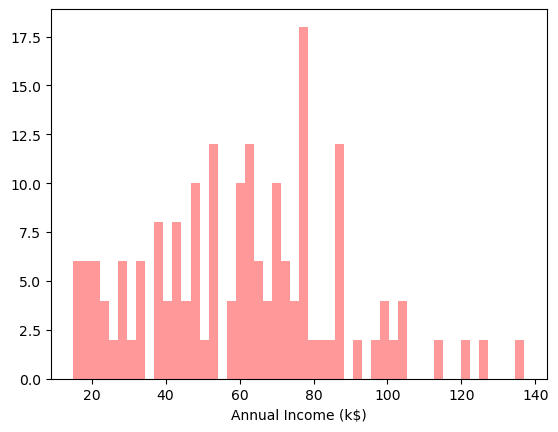

In [12]:
sns.distplot(dataset['Annual Income (k$)'],kde=False,bins=50,color="red")

The Output Shows that most of the customers have incomes between 60k ad 80k per year

plotting the histogram for spending score 

<AxesSubplot:xlabel='Spending Score (1-100)'>

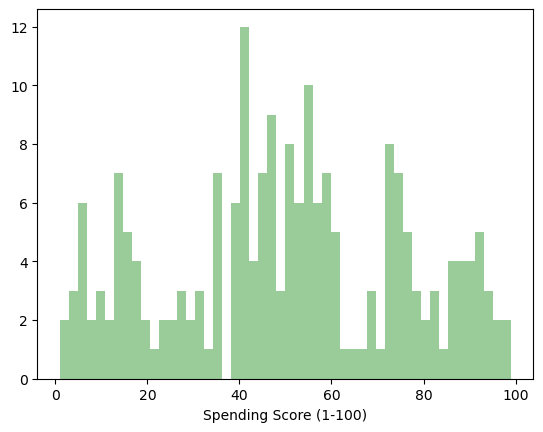

In [13]:
sns.distplot(dataset['Spending Score (1-100)'],kde=False,bins=50,color='green')

Most of the customers spending score is between 40 and 60

Plotting the regression plot for Annual Income against spending score

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

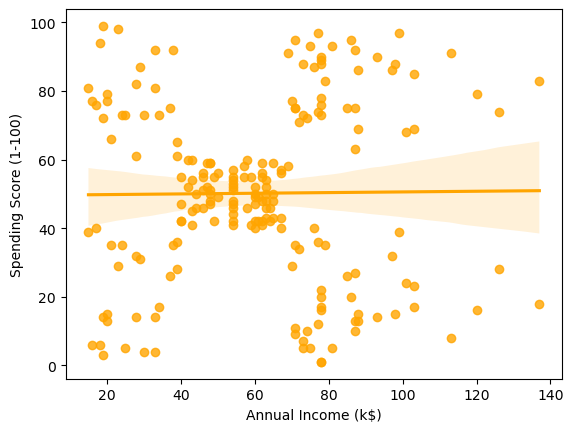

In [14]:
sns.regplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=dataset,color="orange")

The straight line shows that it can be inferred that there is no linear relationship between Annual income and spending score

Plotting the regression plot for spending score against age

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

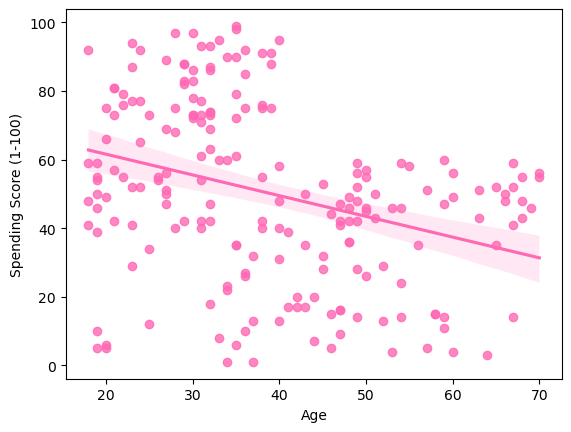

In [15]:
sns.regplot(x='Age',y='Spending Score (1-100)',data=dataset,color="hotpink")

output confirm an inverse linear relationship between age and spending score

In [16]:
dataset= dataset.filter(['Annual Income (k$)','Spending Score (1-100)'],axis=1)

dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
km_model=KMeans(n_clusters=4)
km_model.fit(dataset)

KMeans(n_clusters=4)

In [18]:
print(km_model.cluster_centers_)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [48.26       56.48      ]]


In [19]:
print(km_model.labels_)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


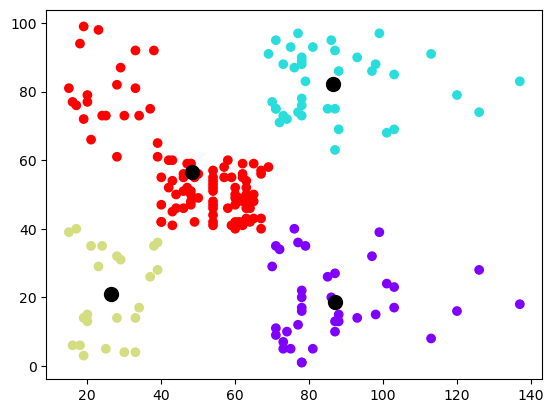

In [20]:
plt.scatter(dataset.values[:,0], dataset.values[:,1],c=km_model.labels_,cmap="rainbow")

plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c="black")

The Above Method Is Elbow Method, which is used to find the ideal number of clusters

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.
We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. 

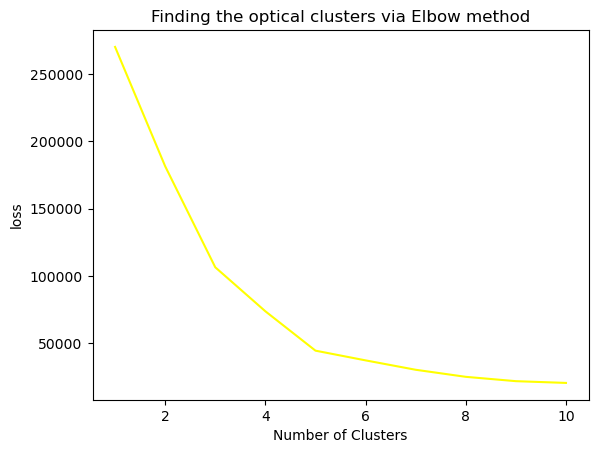

In [26]:
loss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i).fit(dataset)
    loss.append(km.inertia_)
    
#printing  loss against the number of clusters
         
import matplotlib.pyplot as plt
plt.plot(range(1,11),loss,color='yellow')
plt.title("Finding the optical clusters via Elbow method")
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()


In [27]:
km_model=KMeans(n_clusters=5)
km_model.fit(dataset)

KMeans(n_clusters=5)

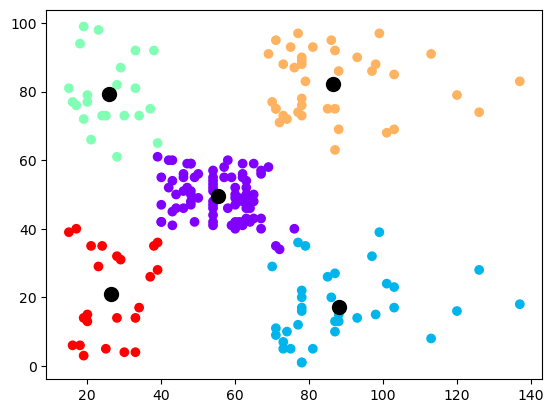

In [28]:
plt.scatter(dataset.values[:,0], dataset.values[:,1],c=km_model.labels_,cmap="rainbow")

plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c="black")

In [29]:
print(km_model.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


In [31]:
cluster_map=pd.DataFrame()
cluster_map['data_index']=dataset.index.values
cluster_map['cluster']=km_model.labels_
cluster_map

,data_index,cluster
0,0,4
1,1,2
2,2,4
3,3,2
4,4,4
...,...,...
195,195,3
196,196,1
197,197,3
198,198,1


In [32]:
cluster_map=cluster_map[cluster_map.cluster==1]
cluster_map.head()

,data_index,cluster
124,124,1
128,128,1
130,130,1
134,134,1
136,136,1


In [33]:
cluster_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 124 to 198
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   data_index  35 non-null     int64
 1   cluster     35 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 700.0 bytes
